<a href="https://colab.research.google.com/github/Scatter098/EDA_-data_analysis/blob/main/EDA_on_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
#listing down coloumn 

df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## categorical columns 
----
- Survived 
- pClass 
- Sex 
- Silbsp
- Parch
- Embarked 
----
---
## Numerical columns 

- age 
- fare
- passeger id 

-----
---
## mixed coulmn 

- name 
- Ticket 
- cabin 



```
# This is formatted as code
```



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# cheack missing value 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# few conclusion 
# 1. missing values in age , cabin and embarked columns 
# 2. more than 70 percent values  are missing in cabin columns . will have to drop 
# 3. few columns have inappropriate data types

In [10]:
# drop the cabin column 
df.drop(columns=['Cabin'],inplace=True)

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
 #inputinng missing values for age 
    # stragety mean 

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
# Embarked have only 2 missing value 
# finding the most appeared value in embarked column 

df['Embarked'].value_counts()



S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#s it is 
df['Embarked'].fillna('S', inplace=True)

In [16]:
# want to one more thing 
# should i change the sibsp and parch to categories 

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### changing data type for the following cols 
---
- Survived (category) 
- Pclass(cateory) 
- Sex(catgory) 
- Age(int) 
- Embarked(category) 


In [17]:
df['Survived']= df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [19]:
#five point summary 
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


out if  891 62 people diet in the accident


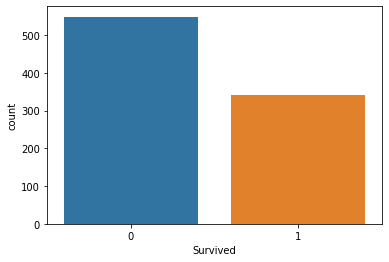

In [20]:
# univariate analysis 

# lets start with survived column

sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print('out if  891 {} people diet in the accident'.format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


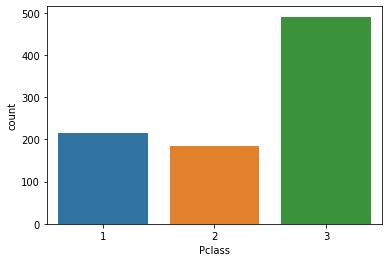

In [21]:
print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

#conclusion: 3 pclass was the most crowded class

male      64.758698
female    35.241302
Name: Sex, dtype: float64


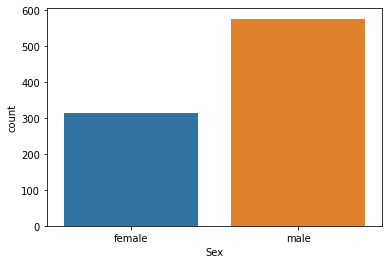

In [22]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(df['Sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


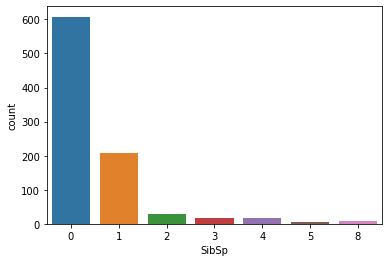

In [23]:
print(df['SibSp'].value_counts())
sns.countplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


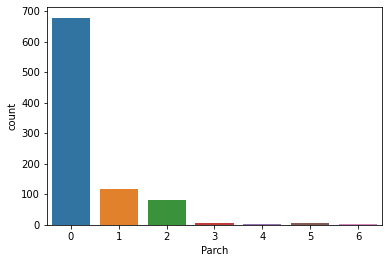

In [24]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


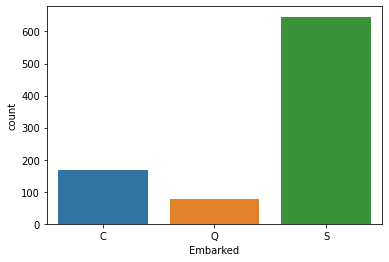

In [25]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(df['Embarked'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577
0.9865867453652877


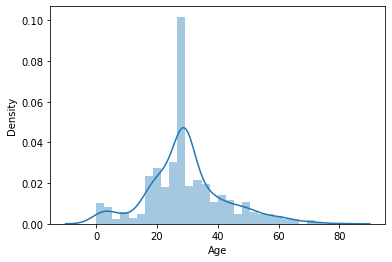

In [26]:
# age column 

sns.distplot(df['Age'])

print(df['Age'].skew())
print(df['Age'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


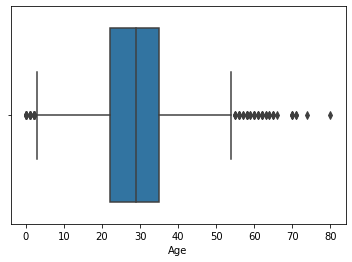

In [27]:
# lets cheack outliers in data 
sns.boxplot(df['Age'])

In [28]:
# just for curiosity 
print('people with age in between 60 and 70 are:', df[(df['Age']>60)& (df['Age']<70)].shape[0])
print('people with age greater than 70 and 75 are: ',df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print('people with age greater than 75 are: ',df[(df['Age']>75)].shape[0])



print('people with age between 0 and 1 is :',df[df['Age']<1].shape[0])

people with age in between 60 and 70 are: 15
people with age greater than 70 and 75 are:  6
people with age greater than 75 are:  1
people with age between 0 and 1 is : 7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


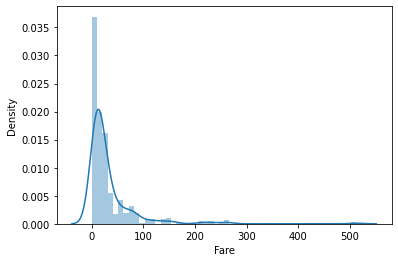

In [29]:
# fare column 
sns.distplot(df['Fare'])

In [30]:
# it is heavly right skew
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


In [31]:
print ('People with fare in between $200 and $300', df[(df['Fare']>200) & (df["Fare"]<300)].shape[0])
print('people with fare in greater than $300', df[(df["Fare"]>300)].shape[0])
#according to this analysis  those 3 are outliers 

People with fare in between $200 and $300 17
people with fare in greater than $300 3


### conclusion 

- highly skew data , a lot of people had cheaper tikets 
- outliers are there in the data 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


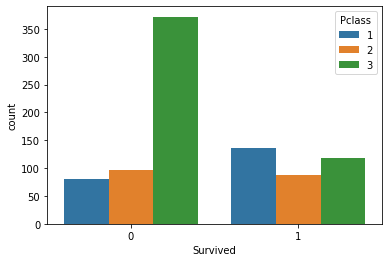

In [32]:
#multiviate Analysis 

# survival with Pclass 

sns.countplot(df['Survived'],hue=df['Pclass'])


pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r : round((r/r.sum())*100,1) , axis =1 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


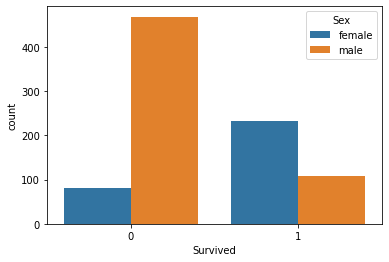

In [33]:
# Survival with sex 
sns.countplot(df['Survived'],hue=df['Sex'])

pd.crosstab(df['Sex'],df['Survived']).apply(lambda r : round((r/r.sum())*100 , 1),axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


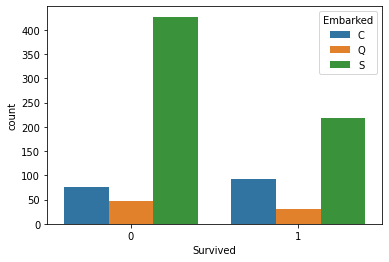

In [34]:
#Survival with Embarked 
sns.countplot(df["Survived"],hue=df["Embarked"])

<Figure size 1080x432 with 0 Axes>

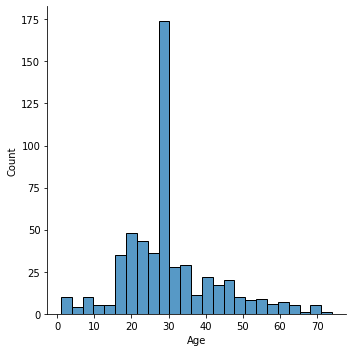

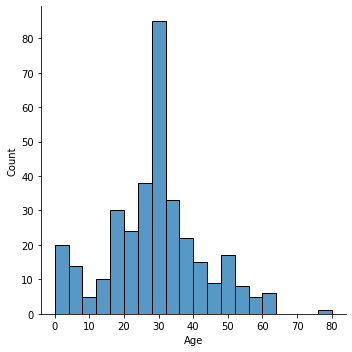

In [36]:
#Survived with Age
plt.figure(figsize=(15,6))
sns.displot(df[df['Survived']==0]['Age'])
sns.displot(df[df['Survived']==1]['Age'])

<Figure size 1080x432 with 0 Axes>

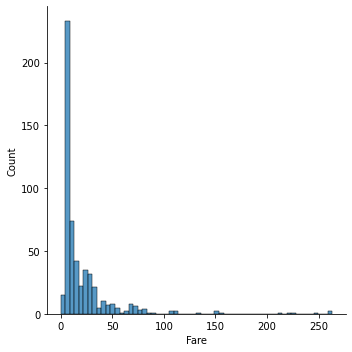

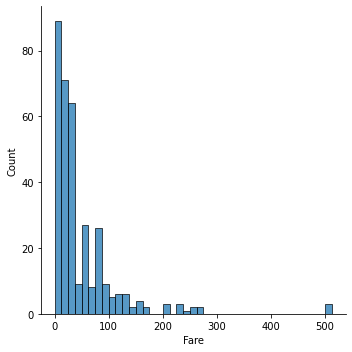

In [40]:
#Survived with Age

plt.figure(figsize=(15,6))
sns.displot(df[df['Survived']==0]['Fare'])
sns.displot(df[df['Survived']==1]['Fare'])

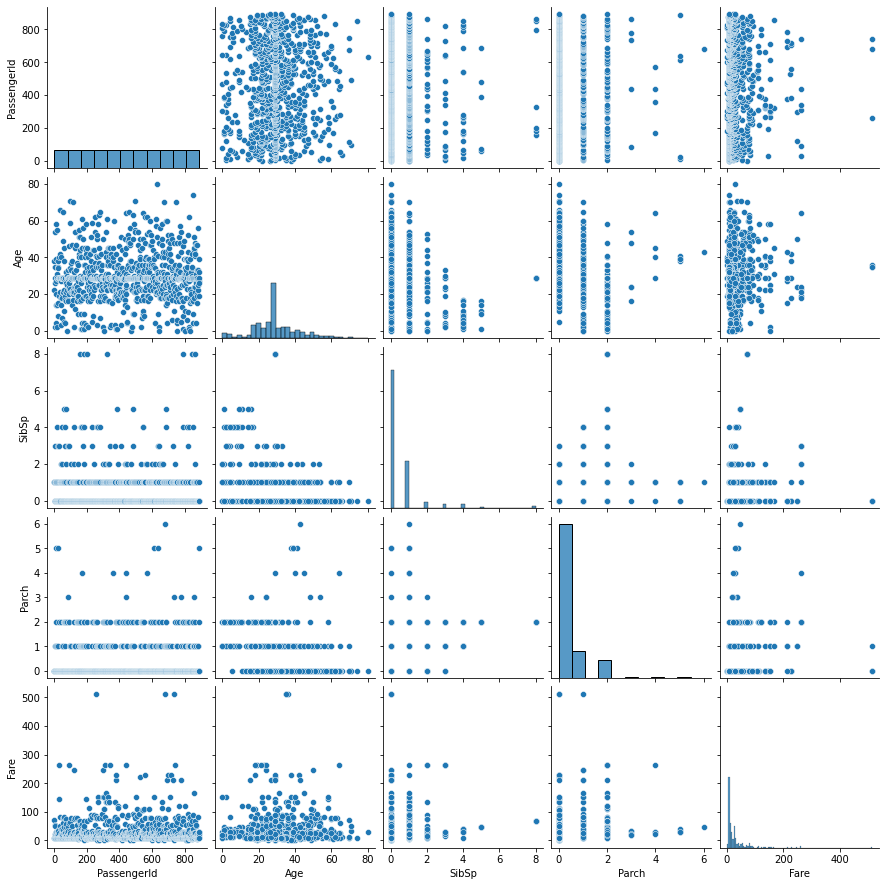

In [41]:
sns.pairplot(df)

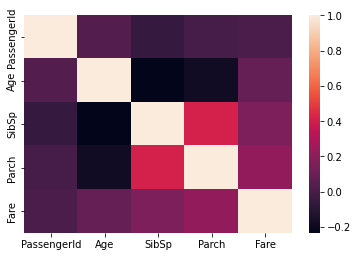

In [42]:
sns.heatmap(df.corr())

In [45]:
#feature EnginerbSp ad parch cols 


# we will create a new cilumn b the name of famiy wihch will be the sum SIbSp and parch column 
df['Family_size']=df['Parch'] + df['SibSp']

In [46]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
466,467,0,2,"Campbell, Mr. William",male,29,0,0,239853,0.0000,S,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29,0,0,239854,0.0000,S,0
445,446,1,1,"Dodge, Master. Washington",male,4,0,2,33638,81.8583,S,2
695,696,0,2,"Chapman, Mr. Charles Henry",male,52,0,0,248731,13.5000,S,0
554,555,1,3,"Ohman, Miss. Velin",female,22,0,0,347085,7.7750,S,0


In [47]:
# NOw we will a new feature by the name of family type 

def Family_type(number):
  if number==0:
    return 'Alone'
  elif number >0 and number<=4:
    return 'Medium'
  else:
    return 'Large'

In [49]:
df['Family_type']=df['Family_size'].apply(Family_type)

In [50]:
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
495,496,0,3,"Yousseff, Mr. Gerious",male,29,0,0,2627,14.4583,C,0,Alone
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52,1,0,36947,78.2667,C,1,Medium
549,550,1,2,"Davies, Master. John Morgan Jr",male,8,1,1,C.A. 33112,36.7500,S,2,Medium
23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,S,0,Alone
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28,0,0,350042,7.7958,S,0,Alone
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18,0,0,3101265,7.4958,S,0,Alone


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


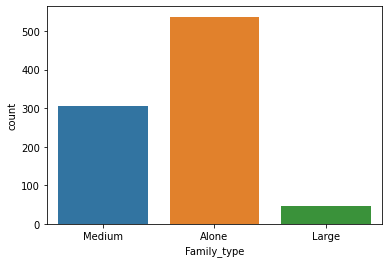

In [59]:
sns.countplot(df['Family_type'])
pd.crosstab(df['Family_type'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

In [53]:
# drop SibSp , Parch and Family_size 

df.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [54]:
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42,348121,7.6500,S,Alone
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,347082,31.2750,S,Large
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,36928,164.8667,S,Medium
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46,PC 17593,79.2000,C,Alone
324,325,0,3,"Sage, Mr. George John Jr",male,29,CA. 2343,69.5500,S,Large
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,Medium


## detecting outliers 
---
#### Numerical data 
- if the data us following normal distrubution anything beyond 35d - mean 35d be conider as an outlier 
- if the data does not follow normal distrubution, using boxplot we can eliiatre poitns beyonds Q! - 1.5 IOR and Q3+ 1.5IQR

----
### Categorical data 
- if theis highly inblance for eg male 100  adn female 2 then we can eliminate female 

In [70]:
# one hot encoding 

df.sample(4)
# cols to be tranfromed are plcass , sex , Embarked , family_type 

df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','Family_type'],drop_first=True)

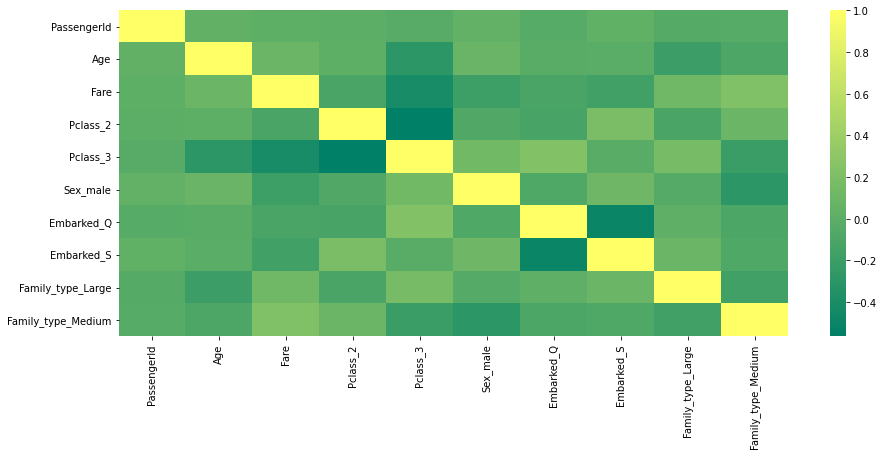

In [71]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='summer')

In [72]:
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71.2833,0,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0


## drwaing conclusions 

- chances of female survival is higher than male survival 
- travelling in pclass 3 was deadlist 
- somehow,people  going to c survived more 
- peopel in the age of 20 to 40  had higher chance of not surviving 
- people travelling with smaller familes had higher chance of surviving the accident in comparision to perople with lare families and travelling alone 